<p style="align: center;"><img align=center src="https://s8.hostingkartinok.com/uploads/images/2018/08/308b49fcfbc619d629fe4604bceb67ac.jpg" width=500 height=450/></p>

<h3 style="text-align: center;"><b>Школа глубокого обучения ФПМИ МФТИ</b></h3>

<h3 style="text-align: center;"><b>Домашнее задание. Продвинутый поток. Весна 2021</b></h3>

Это домашнее задание будет посвящено полноценному решению задачи машинного обучения.

Есть две части этого домашнего задания: 
* Сделать полноценный отчет о вашей работе: как вы обработали данные, какие модели попробовали и какие результаты получились (максимум 10 баллов). За каждую выполненную часть будет начислено определенное количество баллов.
* Лучшее решение отправить в соревнование на [kaggle](https://www.kaggle.com/c/advanced-dls-spring-2021/) (максимум 5 баллов). За прохождение определенного порогов будут начисляться баллы.


**Обе части будут проверяться в формате peer-review. Т.е. вашу посылку на степик будут проверять несколько других студентов и аггрегация их оценок будет выставлена. В то же время вам тоже нужно будет проверить несколько других учеников.**

**Пожалуйста, делайте свою работу чистой и понятной, чтобы облегчить проверку. Если у вас будут проблемы с решением или хочется совета, то пишите в наш чат в телеграме или в лс @runfme. Если вы захотите проаппелировать оценку, то пипшите в лс @runfme.**

**Во всех пунктах указания это минимальный набор вещей, которые стоит сделать. Если вы можете сделать какой-то шаг лучше или добавить что-то свое - дерзайте!**

# Как проверять?

Ставьте полный балл, если выполнены все рекомендации или сделано что-то более интересное и сложное. За каждый отсустствующий пункт из рекомендация снижайте 1 балл.

# Метрика

Перед решением любой задачи важно понимать, как будет оцениваться ваше решение. В данном случае мы используем стандартную для задачи классификации метрику ROC-AUC. Ее можно вычислить используя только предсказанные вероятности и истинные классы без конкретного порога классификации + она работает даже если классы в данных сильно несбалансированны (примеров одного класса в десятки раз больше примеров длугого). Именно поэтому она очень удобна для соревнований.

Посчитать ее легко:


In [131]:
from sklearn.metrics import roc_auc_score, roc_curve

y_true = [
    0,
    1,
    1,
    0,
    1
]

y_predictions = [
    0.1,
    0.9,
    0.4,
    0.6,
    0.61
]

roc_auc_score(y_true, y_predictions)

0.8333333333333333

# Первая часть. Исследование

In [132]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
import seaborn as sns

## Загрузка данных (2 балла)

1) Посмотрите на случайные строчки. 

2) Посмотрите, есть ли в датасете незаполненные значения (nan'ы) с помощью data.isna() или data.info() и, если нужно, замените их на что-то. Будет хорошо, если вы построите табличку с количеством nan в каждой колонке.

In [133]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [134]:
path = '/content/drive/MyDrive/DLSchool/Домашние задания/8.1 Домашнее задание. Решение ML-задачи и kaggle'
data = pd.read_csv(path + '/train.csv')

In [135]:
# Для вашего удобства списки с именами разных колонок

# Числовые признаки
num_cols = [
    'ClientPeriod',
    'MonthlySpending',
    'TotalSpent'
]

# Категориальные признаки
cat_cols = [
    'Sex',
    'IsSeniorCitizen',
    'HasPartner',
    'HasChild',
    'HasPhoneService',
    'HasMultiplePhoneNumbers',
    'HasInternetService',
    'HasOnlineSecurityService',
    'HasOnlineBackup',
    'HasDeviceProtection',
    'HasTechSupportAccess',
    'HasOnlineTV',
    'HasMovieSubscription',
    'HasContractPhone',
    'IsBillingPaperless',
    'PaymentMethod'
]

feature_cols = num_cols + cat_cols
target_col = 'Churn'

In [136]:
# смотрим на пропущенные значения
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5282 entries, 0 to 5281
Data columns (total 20 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   ClientPeriod              5282 non-null   int64  
 1   MonthlySpending           5282 non-null   float64
 2   TotalSpent                5282 non-null   object 
 3   Sex                       5282 non-null   object 
 4   IsSeniorCitizen           5282 non-null   int64  
 5   HasPartner                5282 non-null   object 
 6   HasChild                  5282 non-null   object 
 7   HasPhoneService           5282 non-null   object 
 8   HasMultiplePhoneNumbers   5282 non-null   object 
 9   HasInternetService        5282 non-null   object 
 10  HasOnlineSecurityService  5282 non-null   object 
 11  HasOnlineBackup           5282 non-null   object 
 12  HasDeviceProtection       5282 non-null   object 
 13  HasTechSupportAccess      5282 non-null   object 
 14  HasOnlin

In [137]:
data[data['TotalSpent'] == ' '] # есть пробелы

,ClientPeriod,MonthlySpending,TotalSpent,Sex,IsSeniorCitizen,HasPartner,HasChild,HasPhoneService,HasMultiplePhoneNumbers,HasInternetService,HasOnlineSecurityService,HasOnlineBackup,HasDeviceProtection,HasTechSupportAccess,HasOnlineTV,HasMovieSubscription,HasContractPhone,IsBillingPaperless,PaymentMethod,Churn
1048,0,25.75,,Male,0,Yes,Yes,Yes,Yes,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,0
1707,0,73.35,,Female,0,Yes,Yes,Yes,Yes,DSL,No,Yes,Yes,Yes,Yes,No,Two year,No,Mailed check,0
2543,0,19.70,,Male,0,Yes,Yes,Yes,No,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,One year,Yes,Mailed check,0
3078,0,80.85,,Female,0,Yes,Yes,Yes,No,DSL,Yes,Yes,Yes,No,Yes,Yes,Two year,No,Mailed check,0
3697,0,20.00,,Female,0,Yes,Yes,Yes,No,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,0
4002,0,61.90,,Male,0,No,Yes,Yes,Yes,DSL,Yes,Yes,No,Yes,No,No,Two year,Yes,Bank transfer (automatic),0
4326,0,25.35,,Male,0,Yes,Yes,Yes,Yes,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,0
4551,0,52.55,,Female,0,Yes,Yes,No,No phone service,DSL,Yes,No,Yes,Yes,Yes,No,Two year,Yes,Bank transfer (automatic),0
4598,0,56.05,,Female,0,Yes,Yes,No,No phone service,DSL,Yes,Yes,Yes,Yes,Yes,No,Two year,No,Credit card (automatic),0


In [138]:
"""убираем пробелы, пребразует в float значения"""
data = data.replace(' ', float('0'))
data['TotalSpent'] = data['TotalSpent'].astype(float)

In [139]:
data[data['TotalSpent'] == ' ']

,ClientPeriod,MonthlySpending,TotalSpent,Sex,IsSeniorCitizen,HasPartner,HasChild,HasPhoneService,HasMultiplePhoneNumbers,HasInternetService,HasOnlineSecurityService,HasOnlineBackup,HasDeviceProtection,HasTechSupportAccess,HasOnlineTV,HasMovieSubscription,HasContractPhone,IsBillingPaperless,PaymentMethod,Churn


## Анализ данных (3 балла)

1) Для численных призанков постройте гистограмму (*plt.hist(...)*) или boxplot (*plt.boxplot(...)*). Для категориальных посчитайте количество каждого значения для каждого признака. Для каждой колонки надо сделать *data.value_counts()* и построить bar диаграммы *plt.bar(...)* или круговые диаграммы *plt.pie(...)* (хорошо, елси вы сможете это сделать на одном гарфике с помощью *plt.subplots(...)*). 

2) Посмотрите на распределение целевой переменной и скажите, являются ли классы несбалансированными.

3) (Если будет желание) Поиграйте с разными библиотеками для визуализации - *sns*, *pandas_visual_analysis*, etc.

Второй пункт очень важен, потому что существуют задачи классификации с несбалансированными классами. Например, это может значить, что в датасете намного больше примеров 0 класса. В таких случаях нужно 1) не использовать accuracy как метрику 2) использовать методы борьбы с imbalanced dataset (обычно если датасет сильно несбалансирован, т.е. класса 1 в 20 раз меньше класса 0).

In [140]:
# YOUR CODE
"""Строим графики чтобы посмотреть в каких столбцах у нас есть выбросы.
 Для этого создадим функцию def get_boxplot(column).""" 
def get_boxplot(data, column):
    fig, ax = plt.subplots(figsize=(14, 4))
    sns.boxplot(x=column,
                data=data,
                ax=ax)
    plt.xticks(rotation=0)
    ax.set_title('Boxplot for ' + column)
    plt.show()

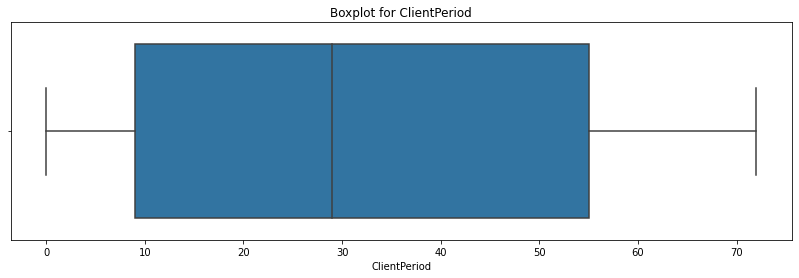

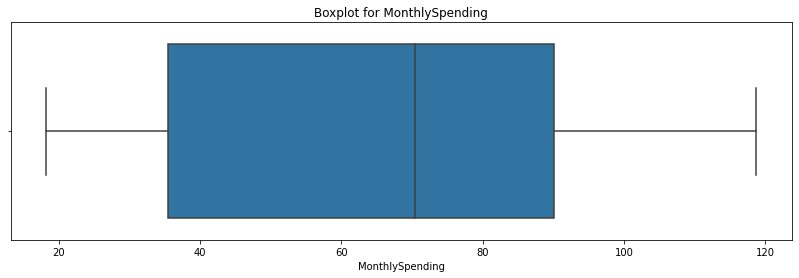

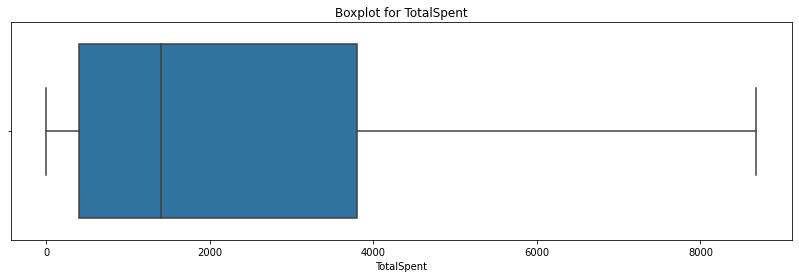

In [141]:
for col in num_cols:
  get_boxplot(data, col)

*Выбросов по числовым признакам нет. Посмотрим на их распределения*

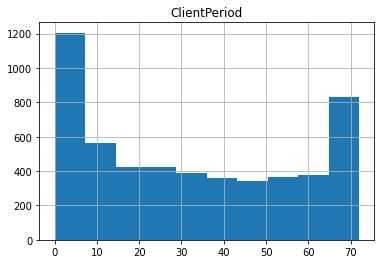

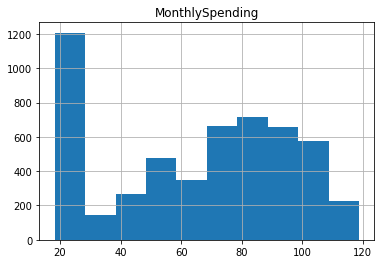

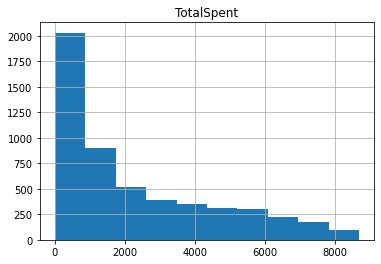

In [142]:
for col in num_cols:
  plt.figure()
  display(data[col].hist())
  plt.title(col)

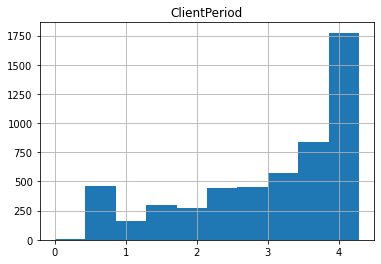

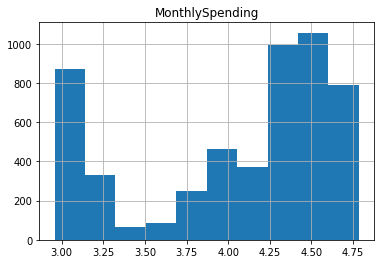

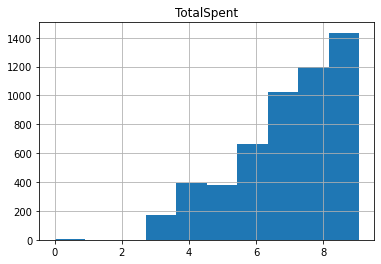

In [143]:
# Прологрифмируем ч. признаки.
for col in num_cols:
  data[col] = np.log(data[col] + 1)
  plt.figure()
  display(data[col].hist())
  plt.title(col)

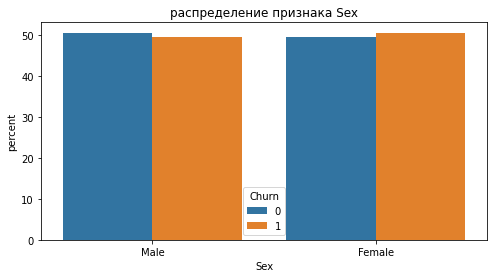

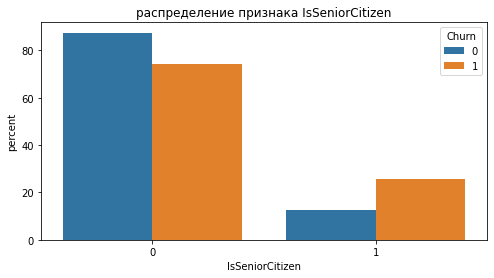

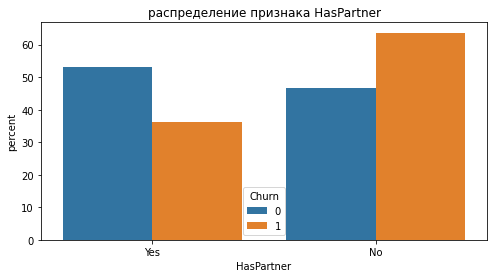

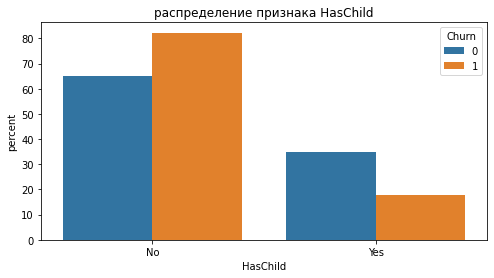

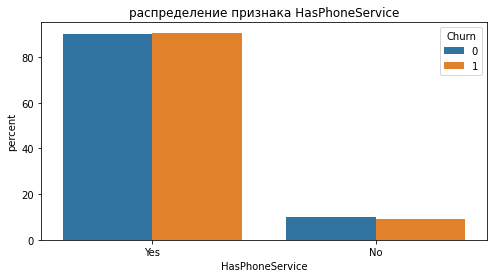

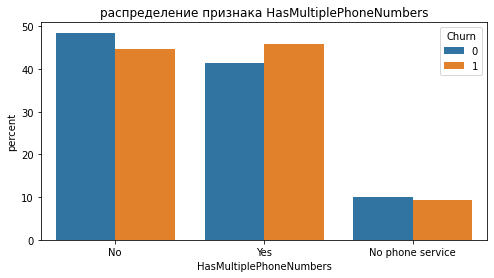

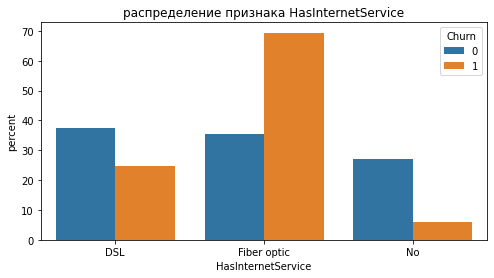

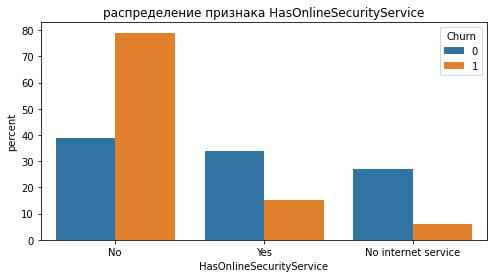

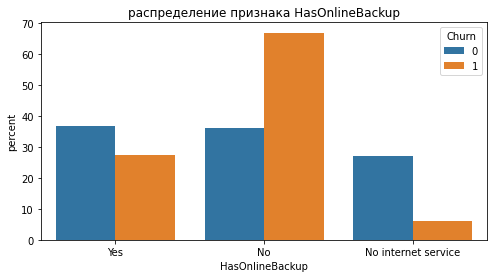

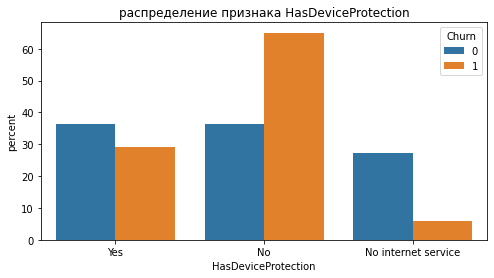

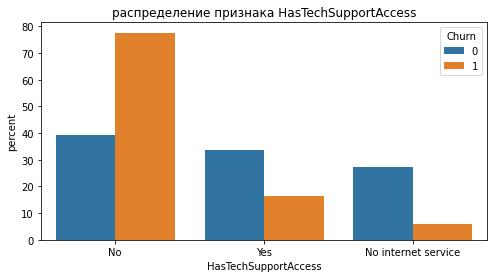

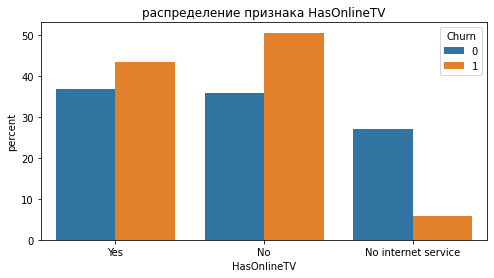

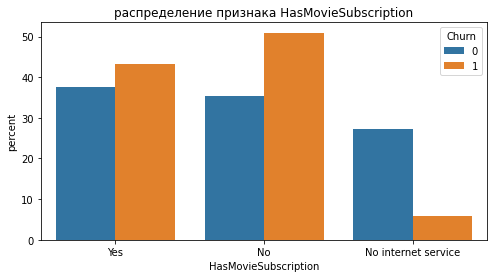

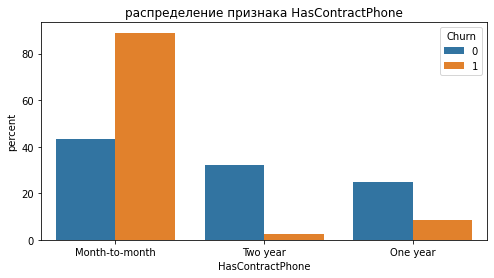

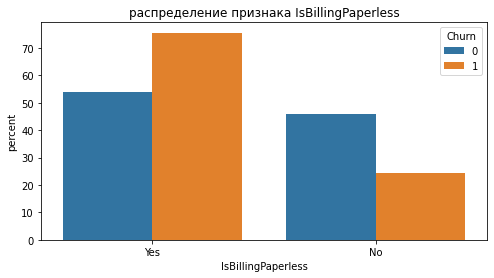

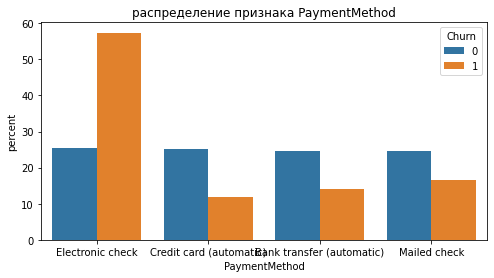

In [144]:
# теперь посмотрим распределение категориальных признаков в зависимости от целевого признака
for col in cat_cols:
  plt.figure(figsize=(8, 4))
  prop_df = data[col].groupby(data[target_col]).value_counts(normalize=True).rename('percent').reset_index()
  prop_df['percent'] *=100
  sns.barplot(x=col, y='percent', hue=target_col, data=prop_df)
  plt.title(f'распределение признака {col}')

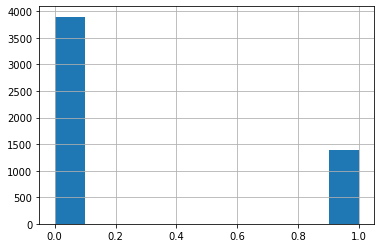

In [145]:
# YOUR CODE
# смотрим на сбалансированность классов.Классы несбалансированны.
data[target_col].hist()

(Дополнительно) Если вы нашли какие-то ошибки в данных или выбросы, то можете их убрать. Тут можно поэксперементировать с обработкой данных как угодно, но не за баллы.

## Применение линейных моделей (3 балла)

1) Обработайте данные для того, чтобы к ним можно было применить LogisticRegression. Т.е. отнормируйте числовые признаки, а категориальные закодируйте с помощью one-hot-encoding'а. 

2) С помощью кроссвалидации или разделения на train/valid выборку протестируйте разные значения гиперпараметра C и выберите лучший (можно тестировать С=100, 10, 1, 0.1, 0.01, 0.001) по метрике ROC-AUC. 

Если вы разделяете на train/valid, то используйте LogisticRegressionCV. Он сам при вызове .fit() подберет параметр С. (не забудьте передать scroing='roc_auc', чтобы при кроссвалидации сравнивались значения этой метрики, и refit=True, чтобы при потом модель обучилась на всем датасете с лучшим параметром C). 


(более сложный вариант) Если вы будете использовать кроссвалидацию, то преобразования данных и LogisticRegression нужно соединить в один Pipeline с помощью make_pipeline, как это делалось во втором семинаре. Потом pipeline надо передать в GridSearchCV. Для one-hot-encoding'a можно испльзовать комбинацию LabelEncoder + OneHotEncoder (сначала превращаем строчки в числа, а потом числа првращаем в one-hot вектора.)

In [146]:
from sklearn.linear_model import LogisticRegression, LogisticRegressionCV
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.preprocessing import StandardScaler, RobustScaler, LabelEncoder
from sklearn.preprocessing import OneHotEncoder, PolynomialFeatures
from sklearn.pipeline import make_pipeline

poly = PolynomialFeatures(3)

In [147]:
# YOUR CODE
data = pd.get_dummies(data, columns = cat_cols)
cat_cols_new = []
for col_name in cat_cols:
    cat_cols_new.extend(filter(lambda x: x.startswith(col_name), data.columns))
cat_cols = cat_cols_new


In [148]:
X = data[cat_cols+num_cols]
y = data[target_col].values

In [149]:
X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=0.8, random_state=42)
# стандартизируем данные
std = StandardScaler()
X_train_scaled = std.fit_transform(X_train)
X_test_scaled = std.transform(X_test)

In [150]:
# Применим LogisticRegressionCV и выведем ее score
lr_cv = LogisticRegressionCV(max_iter=100,  scoring='roc_auc', class_weight='balanced',  cv=5, n_jobs=-1, random_state=42)
lr_cv.fit(X_train, y_train)

y_pred_scaled = lr_cv.predict_proba(X_test)[:, 1]
y_train_predicted = lr_cv.predict_proba(X_train)[:, 1]
y_test_predicted = lr_cv.predict_proba(X_test)[:, 1]

In [151]:
roc_auc_score(y_test, y_test_predicted)

0.8308475171082645

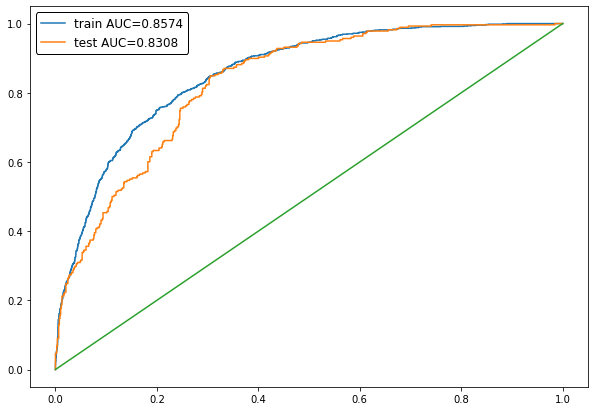

In [152]:
train_auc = roc_auc_score(y_train, y_train_predicted)
test_auc = roc_auc_score(y_test, y_test_predicted)

plt.figure(figsize=(10,7))
plt.plot(*roc_curve(y_train, y_train_predicted)[:2], label='train AUC={:.4f}'.format(train_auc))
plt.plot(*roc_curve(y_test, y_test_predicted)[:2], label='test AUC={:.4f}'.format(test_auc))
legend_box = plt.legend(fontsize='large', framealpha=1).get_frame()
legend_box.set_facecolor("white")
legend_box.set_edgecolor("black")
plt.plot(np.linspace(0,1,100), np.linspace(0,1,100))
plt.show()

Выпишите какое лучшее качество и с какими параметрами вам удалось получить

## Применение градиентного бустинга (2 балла)

Если вы хотите получить баллы за точный ответ, то стоит попробовать градиентный бустинг. Часто градиентный бустинг с дефолтными параметрами даст вам 80% результата за 0% усилий.

Мы будем использовать catboost, поэтому нам не надо кодировать категориальные признаки. catboost сделает это сам (в .fit() надо передать cat_features=cat_cols). А численные признаки нормировать для моделей, основанных на деревьях не нужно.

1) Разделите выборку на train/valid. Протестируйте catboost cо стандартными параметрами.

2) Протестируйте разные занчения параметроа количества деревьев и learning_rate'а и выберите лучшую по метрике ROC-AUC комбинацию. 

(Дополнительно) Есть некоторые сложности с тем, чтобы использовать CatBoostClassifier вместе с GridSearchCV, поэтому мы не просим использовать кроссвалидацию. Но можете попробовать)

# catboost

In [114]:
# YOUR CODE
!pip install catboost

In [153]:
from catboost import CatBoostClassifier
import catboost
param_grid = {
        "learning_rate":[0.025, 0.03, 0.04, 0.05],
        "min_data_in_leaf":[70, 80, 90],
        "depth": [2, 3, 4, 5],
        "iterations":[160, 187, 190, 200]
         } # вот разные параметры, которые мы будем пробовать
c_grid = CatBoostClassifier(cat_features=cat_cols, random_seed=42, verbose=False, eval_metric='AUC')
gs_result = c_grid.grid_search(param_grid, X_train, y=y_train)

# {'depth': 3, 'iterations': 193, 'learning_rate': 0.03, 'min_data_in_leaf': 88}


bestTest = 0.8341636473
bestIteration = 152

Metric AUC is not calculated on train by default. To calculate this metric on train, add hints=skip_train~false to metric parameters.
0:	loss: 0.8341636	best: 0.8341636 (0)	total: 234ms	remaining: 44.7s

bestTest = 0.836219663
bestIteration = 159

Metric AUC is not calculated on train by default. To calculate this metric on train, add hints=skip_train~false to metric parameters.
1:	loss: 0.8362197	best: 0.8362197 (1)	total: 441ms	remaining: 41.9s

bestTest = 0.8375855475
bestIteration = 159

Metric AUC is not calculated on train by default. To calculate this metric on train, add hints=skip_train~false to metric parameters.
2:	loss: 0.8375855	best: 0.8375855 (2)	total: 643ms	remaining: 40.5s

bestTest = 0.8373842593
bestIteration = 159

Metric AUC is not calculated on train by default. To calculate this metric on train, add hints=skip_train~false to metric parameters.
3:	loss: 0.8373843	best: 0.8375855 (2)	total: 858ms	remaining: 40.3s

best

In [154]:
from sklearn.metrics import roc_auc_score

y_train_predicted = c_grid.predict_proba(X_train)[:, 1]
roc_auc_score(y_train, y_train_predicted)

0.8745955344568987

In [155]:
y_test_predicted = c_grid.predict_proba(X_test)[:, 1]
roc_auc_score(y_test, y_test_predicted)

0.8334379992796519

In [156]:
gs_result['params']

{'depth': 4, 'iterations': 160, 'learning_rate': 0.05, 'min_data_in_leaf': 70}

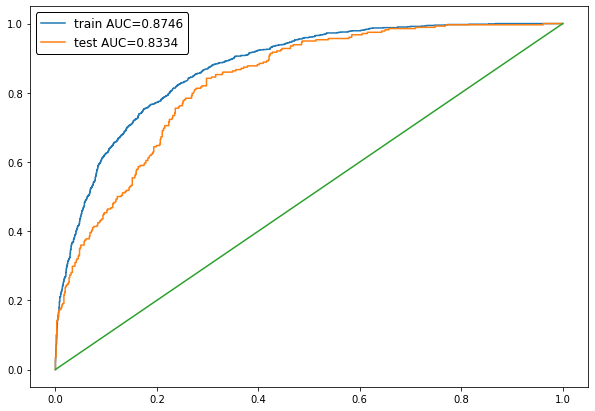

In [157]:
train_auc = roc_auc_score(y_train, y_train_predicted)
test_auc = roc_auc_score(y_test, y_test_predicted)

plt.figure(figsize=(10,7))
plt.plot(*roc_curve(y_train, y_train_predicted)[:2], label='train AUC={:.4f}'.format(train_auc))
plt.plot(*roc_curve(y_test, y_test_predicted)[:2], label='test AUC={:.4f}'.format(test_auc))
legend_box = plt.legend(fontsize='large', framealpha=1).get_frame()
legend_box.set_facecolor("white")
legend_box.set_edgecolor("black")
plt.plot(np.linspace(0,1,100), np.linspace(0,1,100))
plt.show()

Выпишите какое лучшее качество и с какими параметрами вам удалось получить

# xgboost

In [158]:
from xgboost import XGBClassifier, XGBRegressor

In [159]:
xgb = XGBClassifier(n_jobs=-1)
xgb.fit(X_train, y_train)
y_pred_xgb = xgb.predict(X_test)
y_predproba_xgb = xgb.predict_proba(X_test)[:,1]

In [160]:
roc_auc_score(y_test, y_predproba_xgb)

0.8235724642365696

In [161]:
# # Подбор гиперпараметров для XGB
# xgb = XGBClassifier(objective='binary:logistic', random_state=42, n_jobs=-1)
# params = {'n_estimators': [100, 200, 500,], 'max_depth': [
#     3, 4, 5, 6], 'learning_rate': [0.0125, 0.025, 0.03]}
# gsc = GridSearchCV(xgb, param_grid=params, n_jobs=-1)
# gsc.fit(X_train, y_train)

In [162]:
# gsc.best_params_ # {'learning_rate': 0.12500000875, 'max_depth': 3, 'n_estimators': 200}

In [163]:
xgb_best = XGBClassifier(n_jobs=-1, learning_rate=0.03, max_depth=3, n_estimators=200)
xgb_best.fit(X_train, y_train)
y_pred_xgb_best = xgb_best.predict(X_test)
y_predproba_xgb_best = xgb_best.predict_proba(X_test)[:,1]

In [164]:
roc_auc_score(y_test, y_predproba_xgb_best)

0.827266556459582

# Предсказания

In [165]:
best_model = XGBClassifier(n_jobs=-1)

In [166]:
best_model.fit(X, y)

XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=1, gamma=0,
              learning_rate=0.1, max_delta_step=0, max_depth=3,
              min_child_weight=1, missing=None, n_estimators=100, n_jobs=-1,
              nthread=None, objective='binary:logistic', random_state=0,
              reg_alpha=0, reg_lambda=1, scale_pos_weight=1, seed=None,
              silent=None, subsample=1, verbosity=1)

In [170]:
cat_cols = [
    'Sex',
    'IsSeniorCitizen',
    'HasPartner',
    'HasChild',
    'HasPhoneService',
    'HasMultiplePhoneNumbers',
    'HasInternetService',
    'HasOnlineSecurityService',
    'HasOnlineBackup',
    'HasDeviceProtection',
    'HasTechSupportAccess',
    'HasOnlineTV',
    'HasMovieSubscription',
    'HasContractPhone',
    'IsBillingPaperless',
    'PaymentMethod'
]

X_test = pd.read_csv(path + '/test.csv')

X_test = X_test.replace(' ', float('0'))
X_test['TotalSpent'] = X_test['TotalSpent'].astype(float)

# Прологрифмируем ч. признаки.
for col in num_cols:
  X_test[col] = np.log(X_test[col] + 1) 

X_test = pd.get_dummies(X_test, columns = cat_cols)
cat_cols_new = []
for col_name in cat_cols:
    cat_cols_new.extend(filter(lambda x: x.startswith(col_name), X_test.columns))
cat_cols = cat_cols_new

from sklearn.preprocessing import StandardScaler
pca = StandardScaler()
pca.fit(X_test[num_cols + cat_cols])
X = pca.transform(X_test[num_cols + cat_cols])

submission = pd.read_csv(path + '/submission.csv')

submission['Churn'] = best_model.predict_proba(X_test)[:, 1]
submission.to_csv('./my_submission.csv', index=False)

# Kaggle (5 баллов)

Как выставить баллы:

1) 1 >= roc auc > 0.84 это 5 баллов

2) 0.84 >= roc auc > 0.7 это 3 балла

3) 0.7 >= roc auc > 0.6 это 1 балл

4) 0.6 >= roc auc это 0 баллов


Для выполнения задания необходимо выполнить следующие шаги.
* Зарегистрироваться на платформе [kaggle.com](kaggle.com). Процесс выставления оценок будет проходить при подведении итогового рейтинга. Пожалуйста, укажите во вкладке Team -> Team name свои имя и фамилию в формате Имя_Фамилия (важно, чтобы имя и фамилия совпадали с данными на Stepik).
* Обучить модель, получить файл с ответами в формате .csv и сдать его в конкурс. Пробуйте и экспериментируйте. Обратите внимание, что вы можете выполнять до 20 попыток сдачи на kaggle в день.
* После окончания соревнования отправить в итоговый ноутбук с решением на степик. 
* После дедлайна проверьте посылки других участников по критериям. Для этого надо зайти на степик, скачать их ноутбук и проверить скор в соревновании.